# packages

In [122]:
import torch
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
dataset = MNIST(root="data/", download=True)

In [124]:
len(dataset)

60000

In [125]:
test_dataset = MNIST(root="data/", train=False)
len(test_dataset)

10000

In [7]:
# preview of MNIST image
def view_img(dataset, inx):
    image, label = dataset[inx]
    plt.imshow(image, cmap="gray")
    print(f"Label: {label}")

Label: 5


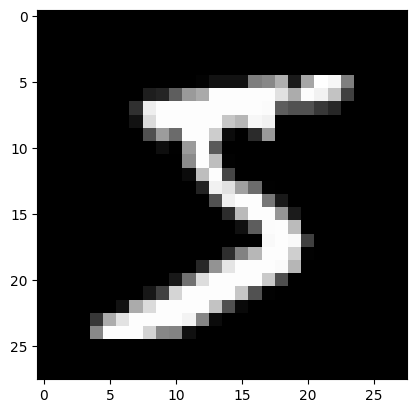

In [10]:
view_img(dataset, 0)

Label: 3


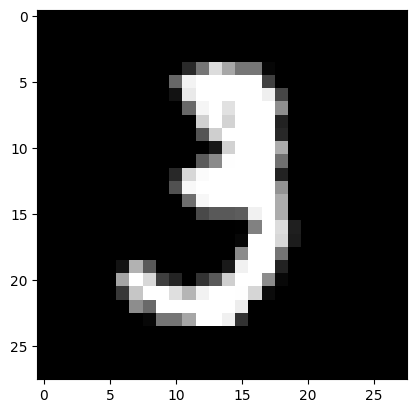

In [11]:
view_img(dataset, 10)

In [126]:
dataset = MNIST(
    root="data/",
    train=True,
    transform=transforms.ToTensor()
)

In [127]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [128]:
print(img_tensor[0, 10:15, 10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


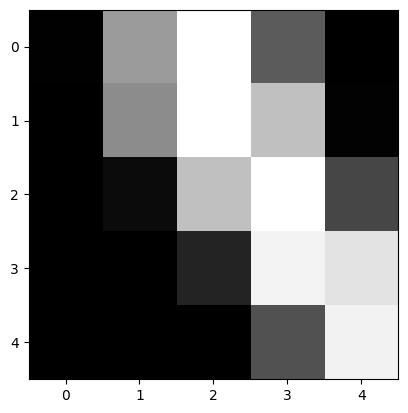

In [19]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap="gray")

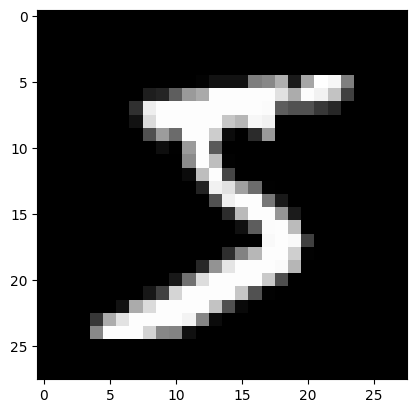

In [20]:
plt.imshow(img_tensor[0], cmap="gray")

In [129]:
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [130]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [105]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

# Model

In [131]:
input_size = 28*28
num_classes = 10

In [107]:
model = nn.Linear(input_size, num_classes)

In [108]:
print(model.weight.shape)

torch.Size([10, 784])


In [109]:
print(model.weight)

Parameter containing:
tensor([[-0.0109, -0.0251,  0.0152,  ..., -0.0086, -0.0044,  0.0329],
        [-0.0021,  0.0315, -0.0257,  ..., -0.0148,  0.0232, -0.0344],
        [ 0.0260, -0.0123, -0.0191,  ..., -0.0067,  0.0286, -0.0091],
        ...,
        [-0.0171, -0.0049, -0.0187,  ...,  0.0112, -0.0097, -0.0066],
        [-0.0080, -0.0278, -0.0030,  ..., -0.0152,  0.0014,  0.0347],
        [-0.0071,  0.0342, -0.0154,  ...,  0.0294, -0.0279, -0.0091]],
       requires_grad=True)


In [110]:
print(model.bias.shape)

torch.Size([10])


In [111]:
model.bias

Parameter containing:
tensor([-0.0075, -0.0177,  0.0135, -0.0315,  0.0142,  0.0234,  0.0087, -0.0163,
         0.0114, -0.0243], requires_grad=True)

In [112]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

In [132]:
images.shape

torch.Size([128, 1, 28, 28])

In [133]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [115]:
# Class demo
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def say_hell(self):
        print("Hello my name is {} !".format(self.name))

The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of size 784, i.e., we need to flatten them. We'll use the .reshape method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. To include this additional functionality within our model, we need to define a custom model by extending the nn.Module class from PyTorch.

In [46]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

In [47]:
model = MnistModel()

In [48]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [49]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [50]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.4110e-02, -2.8481e-02,  1.1098e-02,  ..., -2.5493e-02,
          -1.1672e-02, -1.3072e-03],
         [-7.2517e-03,  2.4093e-02, -1.8071e-02,  ..., -7.5399e-03,
          -2.9718e-02, -3.7912e-03],
         [-6.6382e-03,  4.0731e-03, -2.9095e-02,  ..., -1.8550e-02,
          -2.5742e-02, -7.8925e-03],
         ...,
         [ 1.4409e-02,  3.1872e-02, -1.5781e-02,  ...,  1.4789e-02,
           2.5872e-02, -2.3897e-02],
         [-1.9438e-02, -1.3130e-03,  1.7987e-02,  ..., -3.0187e-02,
          -2.4132e-02,  2.2990e-02],
         [ 4.3647e-03,  1.4937e-02,  3.4290e-02,  ...,  2.3451e-03,
           8.9364e-06,  1.1442e-02]], requires_grad=True),
 Parameter containing:
 tensor([-0.0316, -0.0005,  0.0167,  0.0342,  0.0048, -0.0312,  0.0184,  0.0021,
         -0.0208, -0.0201], requires_grad=True)]

In [53]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

torch.Size([128, 1, 28, 28])


In [54]:
print(f"outputs.shape: {outputs.shape}")
print(f"Sample outputs: {outputs[:2].data}")

outputs.shape: torch.Size([128, 10])
Sample outputs: tensor([[ 0.5100,  0.3026, -0.1824,  0.2925, -0.1237,  0.4090,  0.2150, -0.0536,
          0.0183, -0.1757],
        [ 0.2800,  0.0835, -0.1444,  0.2136,  0.1313,  0.2042,  0.1717, -0.3582,
          0.0583,  0.1045]])


In [56]:
outputs[:2]

tensor([[ 0.5100,  0.3026, -0.1824,  0.2925, -0.1237,  0.4090,  0.2150, -0.0536,
          0.0183, -0.1757],
        [ 0.2800,  0.0835, -0.1444,  0.2136,  0.1313,  0.2042,  0.1717, -0.3582,
          0.0583,  0.1045]], grad_fn=<SliceBackward0>)

In [58]:
# apply softmax for each output row (each col data point along each row)
probs = F.softmax(outputs, dim=1)

# look at the sample probabilities (row 1 and row2, sample 1 and sample 2)
print(f"Sample probabilities: {probs[:2].data}")

# add up the probabilities of an output row
print(f"Sum of one row: {torch.sum(probs[0]).item()}")

Sample probabilities: tensor([[0.1432, 0.1164, 0.0717, 0.1152, 0.0760, 0.1295, 0.1066, 0.0815, 0.0876,
         0.0722],
        [0.1210, 0.0994, 0.0791, 0.1132, 0.1043, 0.1121, 0.1086, 0.0639, 0.0969,
         0.1015]])
Sum of one row: 1.0


> Diff data() and item() methods on tensors

`the data method is used to extract the underlying data from a tensor, while the item method is used to extract a single value as a Python scalar from a tensor that contains only one element.`

In [63]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1432, 0.1210, 0.1279, 0.1389, 0.1115, 0.1295, 0.1362, 0.1365, 0.1098,
        0.1383, 0.1266, 0.1168, 0.1684, 0.1283, 0.1306, 0.1179, 0.1285, 0.1388,
        0.1330, 0.1450, 0.1368, 0.1471, 0.1158, 0.1290, 0.1368, 0.1381, 0.1338,
        0.1223, 0.1132, 0.1393, 0.1350, 0.1472, 0.1261, 0.1504, 0.1326, 0.1338,
        0.1272, 0.1195, 0.1321, 0.1297, 0.1279, 0.1637, 0.1115, 0.1159, 0.1329,
        0.1205, 0.1222, 0.1287, 0.1172, 0.1267, 0.1347, 0.1259, 0.1352, 0.1266,
        0.1370, 0.1316, 0.1324, 0.1315, 0.1247, 0.1444, 0.1443, 0.1308, 0.1131,
        0.1409, 0.1291, 0.1221, 0.1159, 0.1307, 0.1397, 0.1391, 0.1579, 0.1275,
        0.1431, 0.1131, 0.1616, 0.1253, 0.1270, 0.1306, 0.1139, 0.1270, 0.1393,
        0.1386, 0.1203, 0.1185, 0.1624, 0.1173, 0.1144, 0.1180, 0.1210, 0.1457,
        0.1201, 0.1429, 0.1231, 0.1323, 0.1320, 0.1394, 0.1140, 0.1410, 0.1131,
        0.1308, 0.1273, 0.1270, 0.1200, 0.1209, 0.1251, 0.1262, 0.1352, 0.1360,
        0.1496, 0.1193, 0.1116, 0.1303, 

"torch.max" returns each row's largest element and the corresponding index
since the mnist contains number from 0\~9, the corresponding index from 0~9 just equal the relative number

In [64]:
labels

tensor([9, 8, 3, 6, 1, 8, 0, 9, 1, 7, 9, 3, 4, 5, 6, 6, 8, 2, 7, 0, 6, 4, 3, 5,
        3, 5, 9, 6, 2, 0, 6, 2, 4, 2, 1, 7, 7, 5, 3, 6, 1, 0, 7, 1, 2, 2, 7, 2,
        1, 3, 2, 7, 8, 2, 5, 4, 3, 3, 3, 3, 3, 2, 1, 8, 3, 4, 2, 9, 5, 5, 4, 2,
        5, 1, 5, 8, 6, 5, 1, 2, 7, 6, 2, 0, 0, 1, 8, 2, 2, 4, 5, 9, 5, 7, 5, 5,
        1, 0, 9, 9, 7, 5, 1, 9, 6, 3, 9, 7, 0, 7, 5, 9, 5, 9, 5, 2, 6, 6, 4, 4,
        6, 2, 3, 1, 4, 4, 6, 2])

In [62]:
outputs[:2]

tensor([[ 0.5100,  0.3026, -0.1824,  0.2925, -0.1237,  0.4090,  0.2150, -0.0536,
          0.0183, -0.1757],
        [ 0.2800,  0.0835, -0.1444,  0.2136,  0.1313,  0.2042,  0.1717, -0.3582,
          0.0583,  0.1045]], grad_fn=<SliceBackward0>)

In [65]:
torch.sum(preds == labels)

tensor(20)

In [69]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [70]:
accuracy(outputs, labels)

tensor(0.1562)

In [71]:
probs

tensor([[0.1432, 0.1164, 0.0717,  ..., 0.0815, 0.0876, 0.0722],
        [0.1210, 0.0994, 0.0791,  ..., 0.0639, 0.0969, 0.1015],
        [0.1211, 0.0687, 0.0792,  ..., 0.0972, 0.1066, 0.0837],
        ...,
        [0.1187, 0.0809, 0.1194,  ..., 0.0610, 0.1126, 0.0578],
        [0.0872, 0.0987, 0.0914,  ..., 0.0816, 0.1011, 0.0835],
        [0.0972, 0.0877, 0.0965,  ..., 0.0846, 0.0904, 0.0767]],
       grad_fn=<SoftmaxBackward0>)

cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

In [72]:
outputs

tensor([[ 0.5100,  0.3026, -0.1824,  ..., -0.0536,  0.0183, -0.1757],
        [ 0.2800,  0.0835, -0.1444,  ..., -0.3582,  0.0583,  0.1045],
        [ 0.1958, -0.3708, -0.2293,  ..., -0.0247,  0.0677, -0.1741],
        ...,
        [ 0.3433, -0.0398,  0.3491,  ..., -0.3222,  0.2904, -0.3765],
        [-0.0185,  0.1049,  0.0283,  ..., -0.0854,  0.1291, -0.0617],
        [-0.0116, -0.1145, -0.0182,  ..., -0.1503, -0.0841, -0.2478]],
       grad_fn=<AddmmBackward0>)

In [73]:
loss_fn = F.cross_entropy

In [75]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2980, grad_fn=<NllLossBackward0>)


# model training

In [146]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [155]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss=F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {"val_loss": loss, "val_acc": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x["val_acc"] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [156]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [157]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history=[]

    for epoch in range(epochs):

        # Training phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()


        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [159]:
# initial set of randomly initialized weights & biases
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3149962425231934, 'val_acc': 0.1403283178806305}

In [160]:
history1 = fit(5, .001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9397, val_acc: 0.6027
Epoch [1], val_loss: 1.6743, val_acc: 0.7126
Epoch [2], val_loss: 1.4762, val_acc: 0.7536
Epoch [3], val_loss: 1.3262, val_acc: 0.7750
Epoch [4], val_loss: 1.2106, val_acc: 0.7894
